- Import Packages

In [221]:
import random
import json
import matplotlib.pyplot as plt
import numpy as np
import math

- Load Dataset

In [222]:
# path = r"C:\Users\moaxs\Desktop\REU 2025\PDM Project\Code\Greedy Model\job_data.json"
path = "../../Input_Data/job_data.json"
with open(path, 'r') as file: 
    data = json.load(file)

- Simple Parameters

In [223]:
sample_size = 500
start_time = 600
end_time = 1440
max_length = 700

- Greedy Jobs

In [224]:
# Take a random sample of jobs
jobs_array = data['jobs']
random.shuffle (jobs_array)

# List is same length of sample size
flexibility_array = []

i = 0
curr_index = 0
while (i < sample_size) :
    rj = jobs_array[curr_index]['release']
    dj = jobs_array[curr_index]['deadline']
    lj = jobs_array[curr_index]['length']

    fj = dj - rj - lj

    # Check if the specific job lies within the correct window
    # The funky syntax is used to put the job id at the very front of the dictionary
    if rj >= start_time and dj <= end_time and lj <= max_length:
        flexible_id = {'flexible_id': i}
        flexibility = {'flexibility': fj}
        flexible_object = {**flexible_id, **flexibility, **jobs_array[curr_index]}
        flexibility_array.append(flexible_object)

        i += 1
    
    curr_index += 1

flexible = sorted(flexibility_array, key=lambda job: job['flexibility']) 

print(flexible)
print(len(flexible))

[{'flexible_id': 139, 'flexibility': 10, 'release': 843, 'deadline': 887, 'length': 34, 'height': 46.97}, {'flexible_id': 337, 'flexibility': 12, 'release': 645, 'deadline': 673, 'length': 16, 'height': 801.64}, {'flexible_id': 83, 'flexibility': 13, 'release': 778, 'deadline': 1186, 'length': 395, 'height': 330.33}, {'flexible_id': 6, 'flexibility': 17, 'release': 664, 'deadline': 760, 'length': 79, 'height': 891.97}, {'flexible_id': 331, 'flexibility': 18, 'release': 847, 'deadline': 907, 'length': 42, 'height': 50.4}, {'flexible_id': 492, 'flexibility': 18, 'release': 685, 'deadline': 1048, 'length': 345, 'height': 273.43}, {'flexible_id': 168, 'flexibility': 19, 'release': 934, 'deadline': 1174, 'length': 221, 'height': 329.23}, {'flexible_id': 489, 'flexibility': 19, 'release': 860, 'deadline': 990, 'length': 111, 'height': 123.25}, {'flexible_id': 258, 'flexibility': 20, 'release': 611, 'deadline': 1037, 'length': 406, 'height': 59.99}, {'flexible_id': 262, 'flexibility': 21, 're

- Resource Curve

In [225]:
# Instantiate the resource curve
path = "../../Input_Data/solar_data.json"
with open(path, 'r') as file: 
    data = json.load(file)

wind_energy = data['series'][1]['data']
solar_energy = data['series'][2]['data']
hydro_energy = data['series'][3]['data']

# Have 165 hours and you want minute by minute resolution. Therefore the total length of this list needs to be 165 * 60 in length
# The first 60 values of the list need to equal 0, the next need to equal 1. Therefore, i // 60
wind_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(wind_energy_7_days)):
    wind_energy_7_days[i] = wind_energy[ i // 60 ]['value']

solar_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(solar_energy_7_days)):
    solar_energy_7_days[i] = solar_energy[ i // 60 ]['value']

hydro_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(hydro_energy_7_days)):
    hydro_energy_7_days[i] = hydro_energy[ i // 60 ]['value']


total = []
for i in range(165 * 60):
    total_sum = wind_energy_7_days[i] + solar_energy_7_days[i] + hydro_energy_7_days[i]
    total.append(total_sum)

day = 3
resources = total[(24 * day) + start_time : (24 * day) + end_time]

- Find All Possible Start Times for Each Job

In [226]:
intervals = [[] for _ in range(len(flexible))]
for i, job in enumerate(flexible):
    # Extract the necessary information from the job object
    release = job['release'] - start_time
    deadline = job['deadline'] - start_time
    duration = job['length']
    num = release

    # Add the execution intervals to the sublist
    while (num + duration <= deadline):
        intervals[i].append((num, num + duration))
        num += 1

- Definitions

In [227]:
# Iterate through the jobs and add their corresponding heights
height = [job['height'] for job in flexible]

# Specify the number of time steps 
num_time_steps = end_time - start_time

- Label each job and possible interval combination

In [228]:
decision_variables = []
for j, interval_set in enumerate(intervals):
    for i, interval in enumerate(interval_set):
        # Add the decision variable and it's corresponding interval to the list
        decision_variables.append({'name' : f'x_{i}_{j}', 'value': interval})

# This is the name of the objective variable that we will minimize
objective_variable = 'd'

- Find best interval for each job

In [ ]:
final_heights = [0 for _ in range(num_time_steps)]
for job_id, interval_set in enumerate(intervals):
    best_score = float(-math.inf)
    best_job = None

    for interval_id, interval in enumerate(interval_set):
        job_start = flexible[job_id]['release'] - start_time
        job_length = flexible[job_id]['length']
        job_height = flexible[job_id]['height']

        resource = resources[job_start]
        existing_height = final_heights[job_start]

        score = sum([resources[i] - final_heights[i] - job_height for i in range(job_start, job_start + job_length)])

        if score > best_score: 
            best_score = score
            best_job = job_id
            
    for i in range(flexible[best_job]['release'] - start_time, flexible[best_job]['release'] - start_time + flexible[best_job]['length']):
        final_heights[i] += job_height


243
243
243
243
243
243
243
243
243
243
243
45
45
45
45
45
45
45
45
45
45
45
45
45
178
178
178
178
178
178
178
178
178
178
178
178
178
178
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
247
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
85
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
260
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
208
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
191
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
409
409
409
409
409
409
409
409
409
409
409
409
409
40

- Final Heights for Each Job Interval

- Plot jobs

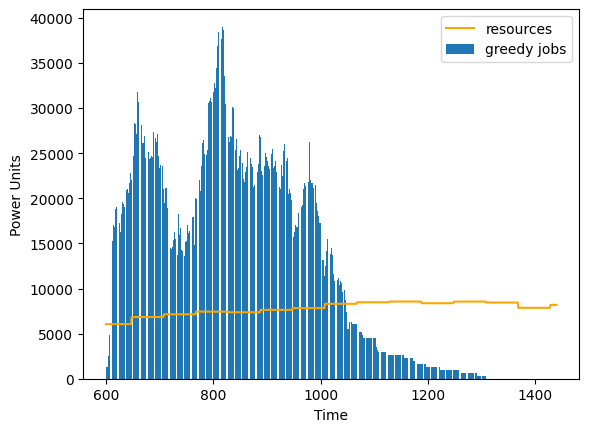

In [ ]:
job_graph_xvalues = np.array([i for i in range(start_time, end_time)])

plt.bar(job_graph_xvalues, final_heights, label="greedy jobs")
plt.plot(job_graph_xvalues, resources, label='resources', color='orange')

plt.xlabel("Time")
plt.ylabel("Power Units")
plt.legend()
plt.show()